Experiment 1: Servomechanism Control

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd

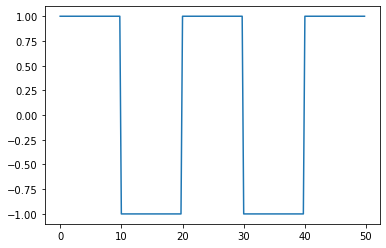

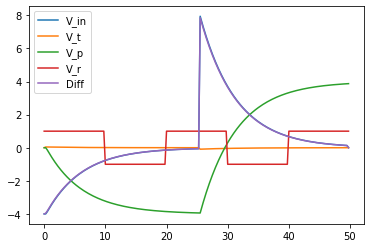

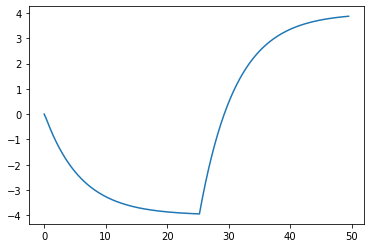

In [4]:
## Prelab Simulation ##

def tachoOutputVoltage(k_t, dTheta):
    return k_t * dTheta

def motorTorque(k_1, V_in, k_2, dTheta):
    return k_1*(V_in - k_2*dTheta)

def calculate_V_in(V_r, V_p, r_1):
    return -1*(V_r+V_p)*r_1

def motorVoltage(k_t,k_m,V_in,c,t):
    return (-1*k_t*k_m*V_in)*(1-math.exp(-1*c*t))/(30*c)

# Define metric arrays and time step parameters
dt = 0.25
tEnd = 50
timeSteps = np.arange(0,tEnd,dt)
V_t = np.zeros(len(timeSteps))
V_in = np.zeros(len(timeSteps))
V_p = np.zeros(len(timeSteps))
theta = np.zeros(len(timeSteps))

# Define constant parameters
k_t = 2
k_m = 1
c = 6

# Try square wave as well as constant reference voltage
V_r = np.array([1 if math.floor(0.1 * t) % 2 == 0 else -1 for t in timeSteps])
V_r_const = 4


plt.plot(timeSteps, V_r)
plt.show()

# Iterate through time steps
for t in range(len(timeSteps[:-1])):
    
    vr = V_r[t]
    V_in[t] = calculate_V_in(V_r_const, V_p[t], 1)
    V_t[t] = motorVoltage(k_t,k_m,V_in[t],c,t)

    # Calculate angular velocity
    dTheta = ((k_m*V_in[t])/c)*(1-math.exp(-1*c*timeSteps[t]))

    if(t == 0):
        theta[t] = 0 + dTheta*dt
    else:
        theta[t] = theta[t-1] + dTheta*dt

    V_p[t+1] = theta[t]

    #print(timeSteps[t],V_p[t],V_in[t],V_t[t], theta[t], dTheta)
    

    if(t > len(timeSteps)/2):
        V_r_const = -4

V_diff = np.add(V_t,V_in)

plt.plot(timeSteps,V_in, label = "V_in")
plt.plot(timeSteps,V_t, label = "V_t")
plt.plot(timeSteps,V_p, label = "V_p")
plt.plot(timeSteps,V_r, label = "V_r")
plt.plot(timeSteps, V_diff, label = "Diff")
plt.legend()
plt.show()

plt.plot(timeSteps[:-1], theta[:-1])

# Example Task

- Record all observations and calculations directly in notebook
- Record all useful information about the work you have done
    - Brief statement of objective
    - Methods for attaining them
    - Results in raw and reduced form
    - Graphs arising from results
    - Analysis and conclusions

- Put frequent date-time markers in text blocks. Use YYYY-MM-DD format
- For every plot, include a text comment on what is plotted and what you learned from the graph
- Should resemble the preliminary state of a final report
- Entries should be in chronological order
- Orderly, easy to follow
- Precise, clear statement of what is to be done in the experiment that follows
- The theory or theoretical statements to be tested or established
- Outline of the measurements and procedures critical to the results
- How it was done:
    - Circuit diagrams
    - Apparatus used
    - critical properties of the apparatus
    - relevant calibrations
    - settings, and why they were chosen

- Results obtained:
    - Unprocessed data
    - reduced graphs which reveal final results
    - Analysis of results - extracting the physical results from the data and an estimate of the errors

- A conclusion

 








 # Task 1

#### [ Lab Session: 2021-09-23 - 3:30 PM]

 ## Objective

 Verify that the operational amplifiers for this experiment are functional and can add and subtract voltages



 ## Theoretical statements to be tested

 In theory, the output voltage from the operational amplifier OU150A should be governed by the equation: V0 = -(R2/R1)*(V1+V2). Since R1=R2, this becomes V0 = -(V1+V2).

 To test this, we will try three different combinations from the power supply, and measure the output voltage:
    1. V1 = 15V, V2 = -15V
    2. V1 = 15V, V2 = 0V
    3. V1 = 0V, V2 = -15V


## Experiment Observations

### Experiment 1 Statistics

Mean (Channel 1): 15.246
Std (Channel 1): 0.001

Mean (Channel 2): -14.578
Std (Channel 2): 0.001

Mean (Channel 3): -0.723
Std (Channel 3): 0.001


### Experiment 2 Statistics

Mean (Channel 1): 15.246
Std (Channel 1): 0.001

Mean (Channel 2): -0.002
Std (Channel 2): 0.001

Mean (Channel 3): -11.772
Std (Channel 3): 0.001


### Experiment 3 Statistics

Mean (Channel 1): -0.001
Std (Channel 1): 0.001

Mean (Channel 2): -14.579
Std (Channel 2): 0.001

Mean (Channel 3): 13.771
Std (Channel 3): 0.001



## Analysis

From our three seperate experiments we can notice a few important characteristics:
- We can confidently verifty that the OU150A with negative feedback has the property V0 = -(V1 + V2)
- It appears that the output never fully reaches +/- 15V. This could be a limitation of the amplifier
- The negative output appears to be "clipped" at a lower absolute voltage than the positive output case
    - Here we are comparing 13.771 V (positive case), against -11.772 V (negative case)

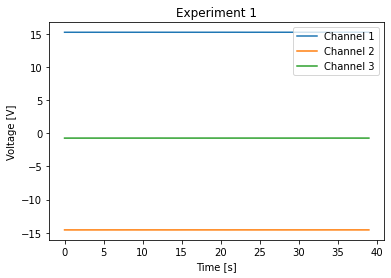

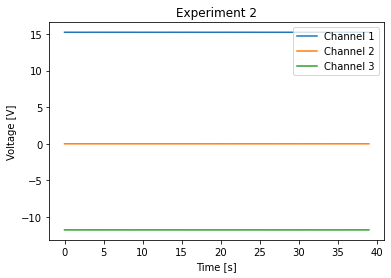

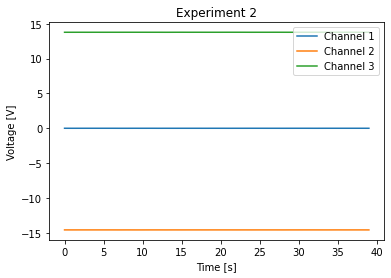

In [5]:
# Look at the results from the three different experiments
exp1Df = pd.read_csv("RawData/0923-OpAmp-Task1-Exp1.dat", sep="\t")
exp2Df = pd.read_csv("RawData/0923-OpAmp-Task1-Exp2.dat", sep="\t")
exp3Df = pd.read_csv("RawData/0923-OpAmp-Task1-Exp3.dat", sep="\t")

#Experiment 1
plt.plot(exp1Df.index, exp1Df["CH1 (V)"], label="Channel 1")
plt.plot(exp1Df.index, exp1Df["CH2 (V)"], label = "Channel 2")
plt.plot(exp1Df.index, exp1Df["CH3 (V)"], label = "Channel 3")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Experiment 1")
plt.show()

#Experiment 2
plt.plot(exp2Df.index, exp2Df["CH1 (V)"], label="Channel 1")
plt.plot(exp2Df.index, exp2Df["CH2 (V)"], label = "Channel 2")
plt.plot(exp2Df.index, exp2Df["CH3 (V)"], label = "Channel 3")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Experiment 2")
plt.show()

#Experiment 2
plt.plot(exp3Df.index, exp3Df["CH1 (V)"], label="Channel 1")
plt.plot(exp3Df.index, exp3Df["CH2 (V)"], label = "Channel 2")
plt.plot(exp3Df.index, exp3Df["CH3 (V)"], label = "Channel 3")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Experiment 2")
plt.show()

Now we seek to determine the range of input (sum) voltages over which the OU150A responsds linearly. To do this, I will use the following procedure:
- Connect the 15 V power source to a potentiometer
- Wire the output of this potentiometer to *both* of the inputs to the OU150A. Therefore, we should expect the output to be double that of the absolute sum of the signal, with a flipped sign.

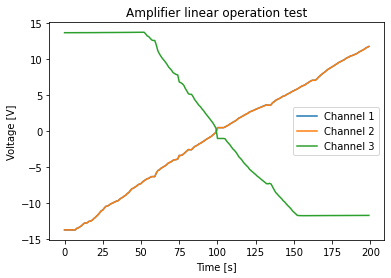

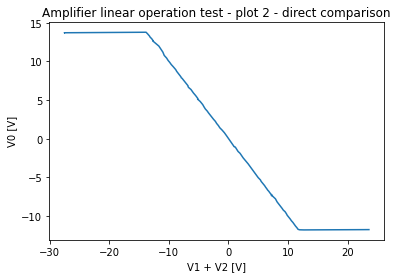

In [11]:
# Load in data files from the "cap" test, concatenate them together
capTestDfv1 = pd.read_csv("RawData/0923-OpAmp-CapTest-v1.dat", sep="\t")
capTestDfv2 = pd.read_csv("RawData/0923-OpAmp-CapTest-v2.dat", sep="\t")
capTestDf = pd.concat([capTestDfv1, capTestDfv2], ignore_index=True)

# Plot the voltages from each channel over time
plt.plot(capTestDf.index, capTestDf["CH1 (V)"], label="Channel 1")
plt.plot(capTestDf.index, capTestDf["CH2 (V)"], label = "Channel 2")
plt.plot(capTestDf.index, capTestDf["CH3 (V)"], label = "Channel 3")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Amplifier linear operation test")
plt.show()

# Plot the output voltage as a function of the input voltages summed
plt.plot(capTestDf["CH1 (V)"] + capTestDf["CH2 (V)"], capTestDf["CH3 (V)"])
plt.xlabel("V1 + V2 [V]")
plt.ylabel("V0 [V]")
plt.title("Amplifier linear operation test - plot 2 - direct comparison")
plt.show()


**Note**: Channel 1 cannot be seen since it has a direct overlap with Channel 2 (since they are connected to the same potentiometer output)


#### Analysis

- We observe the same clipped voltage levels as our original test: ~13.7 V (positive side), and ~11.7 V (negative side)
- From the second graph, we can see that the input clipping point is at ~-11.5 V and ~+11.5 V
    - Therefore our linear input range is [-11.5 V, 11.5 V]
    - After that the output is clipped at the previously mentioned min/max voltages

### Task 1.2

#### Procedure Used

In order to plot V1 against all of V3, V4, and (V3-V4), I set up the apparatus using the circuit diagram provided. I used the large potentiometer on the bench as the "second" potentiometer in the chain, whose output goes directly to the pre-amplifier. I slowly rotated the potentiometer through the "active" region where there was no saturation at either end.

Due to the very sensitive nature of the gain for this setup, I decreased the data update rate from 600 ms to 400 ms to take more accurate readings. Even more accurate measurements might even be beneficial here in order to calculate the gain more accurately.


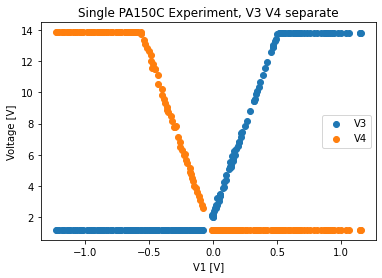

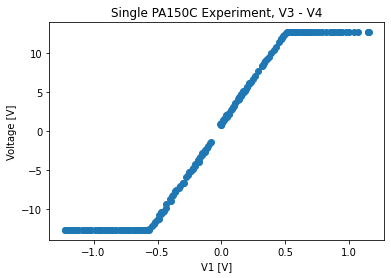

In [15]:
# Plot the data collected
pa_negative_df = pd.read_csv("RawData/09-24-Task1.2-Negative.dat", sep = "\t")
pa_positive_df = pd.read_csv("RawData/09-24-Task1.2-Positive.dat", sep = "\t")

pa_df_single = pd.concat([pa_negative_df, pa_positive_df], ignore_index = True)

plt.scatter(pa_df_single["CH1 (V)"], pa_df_single["CH2 (V)"], label = "V3")
plt.scatter(pa_df_single["CH1 (V)"], pa_df_single["CH3 (V)"], label = "V4")
plt.title("Single PA150C Experiment, V3 V4 separate")
plt.xlabel("V1 [V]")
plt.ylabel("Voltage [V]")
plt.legend()
plt.show()

plt.scatter(pa_df_single["CH1 (V)"], pa_df_single["CH2 (V)"] - pa_df_single["CH3 (V)"])
plt.title("Single PA150C Experiment, V3 - V4")
plt.xlabel("V1 [V]")
plt.ylabel("Voltage [V]")
plt.show()

Using these plots, we can determine the gain of the PA150C pre-amplifier using the following relationship.

$$ Gain = (\frac{V_3 - V_4}{V_1}) $$

To do so, we just need to compute the slope of the linear portion of this graph. Lets look at a middle portion of the dataframe.

In [24]:
# Look at middle portion
print(pa_df_single[80:85])
print(pa_df_single[115:120])

# Use these values to compute rise over run
slope_estimate = ((13.8 - 1.183) - (1.195-7.142))/(0.712-(-0.278))
print("Gain Estimate: %.3f" % (slope_estimate))

    CH1 (V)  CH2 (V)  CH3 (V)
80   -0.278    1.195    7.142
81   -0.261    1.194    6.790
82   -0.257    1.190    6.497
83   -0.240    1.195    6.300
84   -0.221    1.198    6.040
     CH1 (V)  CH2 (V)  CH3 (V)
115    0.814   13.802    1.184
116    0.788   13.800    1.183
117    0.761   13.800    1.183
118    0.738   13.802    1.185
119    0.712   13.800    1.183
Gain Estimate: 18.752


After completing this experiment once, I then doubled the input signal by connecting terminals 1 and 2. I proceeded to repeat the exact same procedure, slowly rotating the potentiometer. On first glance, the output signal was doubled. We can plot the same graphs as before.

#### [ At Home Work Session: 2021-09-24 - 5:15 PM]

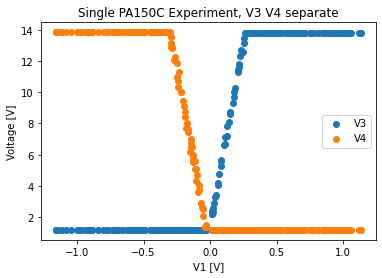

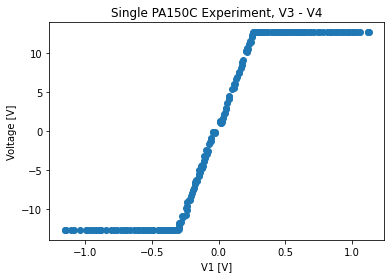

In [25]:
# Now connect channels 1 and 2 on the PA150 to double the signal
pa_negative_doubled_df = pd.read_csv("RawData/09-24-Task1.2-Negative-doubled.dat", sep = "\t")
pa_positive_doubled_df = pd.read_csv("RawData/09-24-Task1.2-Positive-doubled.dat", sep = "\t")

pa_df_double = pd.concat([pa_negative_doubled_df, pa_positive_doubled_df], ignore_index = True)

plt.scatter(pa_df_double["CH1 (V)"], pa_df_double["CH2 (V)"], label = "V3")
plt.scatter(pa_df_double["CH1 (V)"], pa_df_double["CH3 (V)"], label = "V4")
plt.title("Single PA150C Experiment, V3 V4 separate")
plt.xlabel("V1 [V]")
plt.ylabel("Voltage [V]")
plt.legend()
plt.show()

plt.scatter(pa_df_double["CH1 (V)"], pa_df_double["CH2 (V)"] - pa_df_double["CH3 (V)"])
plt.title("Single PA150C Experiment, V3 - V4")
plt.xlabel("V1 [V]")
plt.ylabel("Voltage [V]")
plt.show()

Visually, we can see that the linear region for V1 has been cut in half ( [-0.25 V, 0.25 V]). This is because V1 is now actually double what the graph is showing. Therefore, it appears that the gain has doubled from the previous value measured/calculated.

### Analysis

One important characteristic to note is the difference in behaviour from V3 and V4 on the output of the PA150C pre-amplifier. For negative input voltages, V3 is 0, where V4 is either clipped (past -0.5 V) or linearly decreasing as a function of V1. For positive input voltages < 0.5 V, V4 is 0 and instead V3 is linearly increasing. Past 0.5 V, V3 gets clipped.

It is only when we subtract V4 from V3 that we get this continuosly linear region between [-0.5 V, 0.5 V]. This is the region of linear operation that we want to take advantage of moving forward.

# Task 2: Tachometer Calibration

#### [ Lab Session: 2021-09-23 - 3:30 PM]

## Objective

We want to explore critical properties of the Tachometer used in this setup. Additionally, we need to identify key coefficients and the limitations of the sensor.

## Theoretical Statements to be tested

Ideally, the Tachometer produces an electrical signal proportional to the angular speed of the motor. This relationship is governed by the following equation:

$$ V_t = k_t * \frac{d\theta'}{dt} $$

## Procedure Used

- I set up the table apparatus using the diagram provided
- I noticed very quickly that the voltages I was getting from the potentiometer were from -15V to 15V, which where far too large for the motor operation (since we are saturating the pre-amplifier, which has a very small active range)
- To remedy this, I used the first potentiometer to limit the maximum voltage that the second potentiometer could offer
- To start, I set the output of the first potentiometer to 0.3V to test the forward operation of the motor
- Next, I set the output of the first potentiometer to -0.3V to test the backward operation of the motor
- In both of the above cases, I was measuring the output of the Tachometer, Vt

## Experiment Observations
- During forward operation, there were no voltages (including 0) where the motor completely stopped, however it did spin faster for larger input voltages
- During backward operation, there was a small (offset) range where the motor stopped spinning

### Important Observation that made me repeat the procedure

It took me quite awhile to find the source of this voltage offset where the motor would stop at ~-0.1 V. Ultimately, I found that there was a knob on the PA150C pre-amplifier that controlled this offset. Therefore, I re-calibrated this knob back to make sure there was no offset, and the motor was at a standstill at 0V, equally far from the points where the motor would start spinning for either the positive or negative direction.




[]

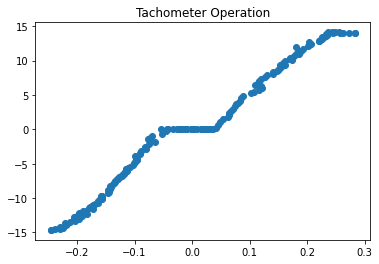

In [26]:
# First plot the output of the Tachometer, Vt as a function of the input voltage, Vin
task2_df_negative = pd.read_csv("RawData/09-24-Task2-Negative.dat", sep = "\t")
task2_df_positive = pd.read_csv("RawData/09-24-Task2-Positive.dat", sep = "\t")

task2_df = pd.concat([task2_df_negative, task2_df_positive], ignore_index = True)

plt.scatter(task2_df["CH1 (V)"], task2_df["CH2 (V)"])
plt.title("Tachometer Operation")
plt.xlabel("Vin [V]")
plt.ylabel("Vt [V]")
plt.show()

Here, we can see that Vt increases linearly for increasing voltages, except within a "deadband" region, where the motor stops spinning. Here, this region is represented by the flat portion of the curve, which corresponds to an interval of [-0.05 V, 0.05 V]. These input voltages are clearly not large enough to overcome any internal resistance the motor may be facing.

Next, to fully understand the experiment, we also conducted the same exact experiment with the input signal doubled (by connecting channels 1 and 2 on the PA150C).

[]

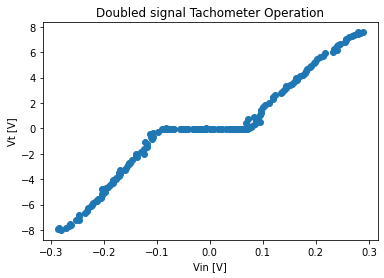

In [27]:
# Now connect channels 1 and 2 on the PA150 to double the signal
task2_df_negative = pd.read_csv("RawData/09-24-Task2-Negative-doubled.dat", sep = "\t")
task2_df_positive = pd.read_csv("RawData/09-24-Task2-Positive-doubled.dat", sep = "\t")

task2_df = pd.concat([task2_df_negative, task2_df_positive], ignore_index = True)

plt.scatter(task2_df["CH1 (V)"], task2_df["CH2 (V)"])
plt.title("Doubled signal Tachometer Operation")
plt.xlabel("Vin [V]")
plt.ylabel("Vt [V]")
plt.plot()

Interestingly, we see that doubling the input signal has the effect of increasing the bank where the motor is not running. This band has extended to [-0.1 V, 0.1 V]. We can also see that the slope of the linear portion of the curve on either side of the flat is half of what it used to be.


******** Verify this part (make sure doubled one and single one are ordered correctly, since we will be using second one moving forward)

Following this part, I needed to determine $k_t$.

To do this, we set $V_{in}$ to various voltages (6 total measurements), and timed how long it took for the output potentiometer to fully rotate 10 times. This data is summarized below in the lists I have created.

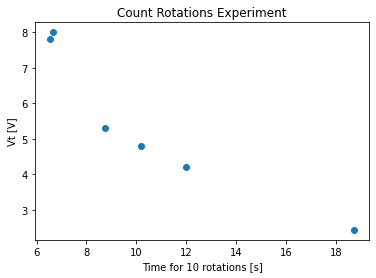

In [39]:
Vin = [0.15, 0.075, 0.107, 0.128, 0.086, 0.09]
Vt = [8, 2.44, 5.3, 7.8, 4.8, 4.2]
t = [6.66, 18.72, 8.75, 6.53, 10.18, 11.97]

revs_df = pd.DataFrame()
revs_df['t'] = t
revs_df['Vin'] = Vin
revs_df['Vt'] = Vt

plt.scatter(revs_df["t"], revs_df["Vt"])
plt.xlabel("Time for 10 rotations [s]")
plt.ylabel("Vt [V]")
plt.title("Count Rotations Experiment")
plt.show()

#### [ At Home Work Session: 2021-09-28 - 11:00 AM]

In order to calcuate $k_t$, I first need to convert the quantity of interest to rotations per second. This will become the x-axis. Then the slope of this line will be equal to $k_t$.



Slope (k_t): 0.876


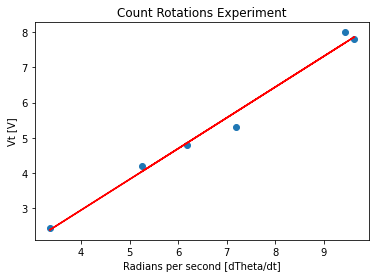

In [51]:
# convert to radians per second which represents dtheta/dt
revs_per_second = list(map(lambda x: 10/x, t))
rads_per_second = list(map(lambda x: 2*math.pi*x, revs_per_second))

plt.scatter(rads_per_second, revs_df["Vt"])

best_fit_line_coeffs = np.polyfit(rads_per_second, revs_df["Vt"], 1)

print("Slope (k_t): %.3f" % best_fit_line_coeffs[-2])

plt.plot(rads_per_second, np.poly1d(best_fit_line_coeffs)(rads_per_second), color = "r")
plt.xlabel("Radians per second [dTheta/dt]")
plt.ylabel("Vt [V]")
plt.title("Count Rotations Experiment")
plt.show()


# Task 3: Motor Transient Response

## Objective

## Theoretical Statements to be Tested

## Procedure used